In [28]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error;

Mean Square Error for Linear Regression:  0.7172512364312045


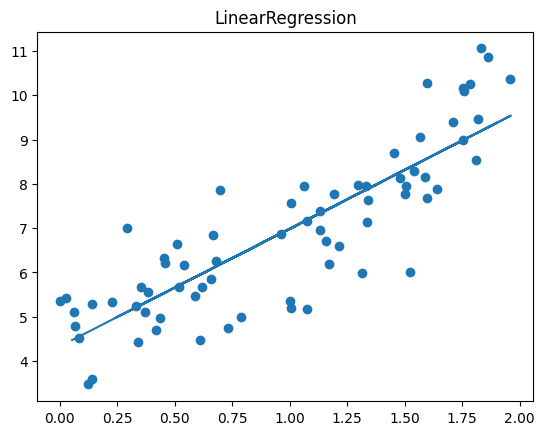

In [21]:
#Linear Regression
X = 2 * np.random.rand(100, 1).reshape(-1,1)  # Features between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)

model = LinearRegression()
model.fit(X,y)
YPredicted=model.predict(X_test)


mseLinear = mean_squared_error(Y_test,YPredicted)
print("Mean Square Error for Linear Regression: ",mseLinear)

plt.title("LinearRegression")
plt.scatter(X_train,Y_train)
plt.plot(X_test,YPredicted)

plt.show()


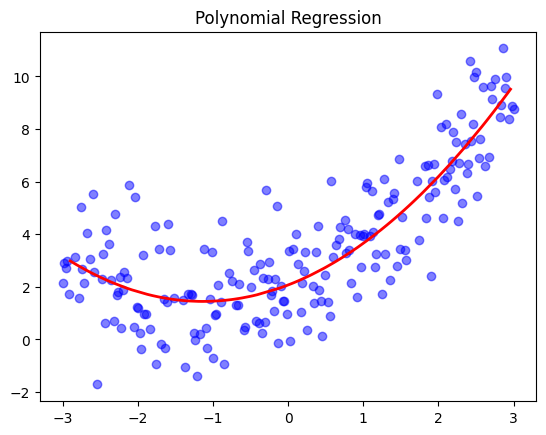

Mean squared error for polynomial Regression:  2.3071258941479025


In [26]:
#Polynomial Regression
X = np.linspace(-3,3,300).reshape(-1,1)
y_true = 0.5*X**2+X+2
noise = np.random.randn(*X.shape)*1.5
y=y_true+noise

#Split data into sets
X_train, X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

poly = PolynomialFeatures(degree=3)

X_trainPoly = poly.fit_transform(X_train)
X_testPoly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_trainPoly,Y_train)

Y=model.predict(X_testPoly)

#Sorting for smooth curve
sorted_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_idx]
Y_pred_sorted = Y[sorted_idx]

plt.scatter(X_train, Y_train, color='blue', alpha=0.5, label='Training Data')
plt.plot(X_test_sorted, Y_pred_sorted, color='red', linewidth=2, label='Prediction (Test Set)')
plt.title("Polynomial Regression")
plt.show()

msePolynomial = mean_squared_error(Y_test,Y)

print("Mean squared error for polynomial Regression: ",msePolynomial)

Mean Squared Error: 0.7656110301482766


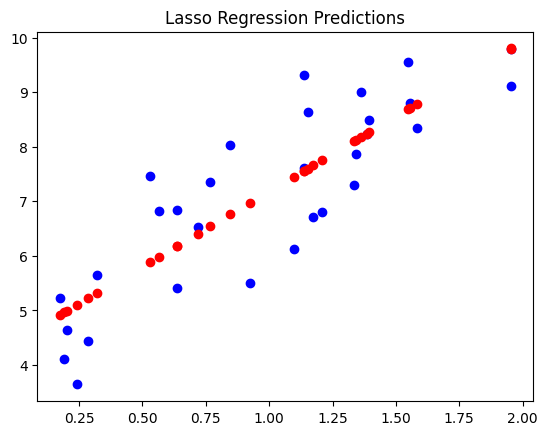

In [33]:
#Lasso Regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Lasso regression model with regularization strength alpha
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:",mse)

# Plot results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Lasso Regression Predictions')
plt.show()